## practicalRegress1

The goal of this practical is to investigate methods for regression:

* In part 1, we look at linear regression with maximum likelihood learning (practicalRegress1)
* In part 2, we look at linear regression with Bayesian learning (practicalRegress2)
* In part 3, we look at non-linear regression (practicalRegress3)
* In part 4, observe Gaussian process regression; step through in debugger. (practicalRegress4)

Work your way through these examples filling in code where it says
"TO DO"




In [18]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as spio

from numpy import sqrt, pi, exp, transpose, matmul
from numpy.linalg import det, inv

# %matplotlib notebook
%matplotlib inline


#### Please be aware of the difference below:
    np.array([1,1,1]).shape == (3,) and its ndim == 1
    np.ones([3,1]).shape == (3,1) and its ndim == 2

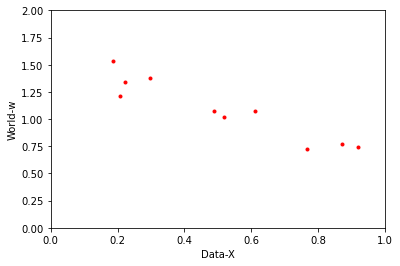

In [19]:
#set seeds for random number generators 
#so we get the same random numbers each time
np.random.seed(5)

#define actual parameters
offsetActual = 1.5  # this is phi_0 in the notes
slopeActual = -0.8  # this is phi_1 in the notes
noiseActual = 0.01  # this is sigma^2 in the notes

#generate some data 
nData = 10
X = np.random.rand(1,nData);
w = offsetActual + slopeActual * X + np.sqrt(noiseActual) * np.random.randn(1,nData)

#transpose w so that it is a column vector like in the notes
w = w.transpose()

#display this data
fig=plt.figure()
plt.plot(X,w.transpose(),'r.')
plt.xlabel('Data-X')
plt.ylabel('World-w')
plt.box('off')
fig.axes[0].set_xlim(0,1)
fig.axes[0].set_ylim(0,2) 
plt.show()


#### now the problem is to fit the data 
#### TODO  - fill in this routine (fitLinearRegressionML) 
see the cell below, where its skeleton can already be found

In [20]:
def fitLinearRegressionML(X,w):
    
    nData = X.shape[1]
    
    #TODO add a one to the start of each data example x    
    
    #REPLACE THIS:
    phi = np.ones((2,1));
    
    #extract the slope and offset from this vector
    offsetEst = phi[0];
    slopeEst = phi[1];

    #TODO compute the variance parameter
    #Replace this
    noiseEst = np.array(0.05);
    
    #performing checks on the data created
    if not (phi.ndim == 2 and phi.size == 2):
        raise ValueError("ERROR: phi should have shape (2,1), shape:{:} ".format(phi.shape)) 
    elif not (noiseEst.ndim==0 and noiseEst.size == 1):
        raise ValueError("ERROR: noiseEst should be scalar(ndim=0,shape=(),), shape:{:} ".format(noiseEst.shape)) 
    else:
        pass
    
    return offsetEst,slopeEst,noiseEst

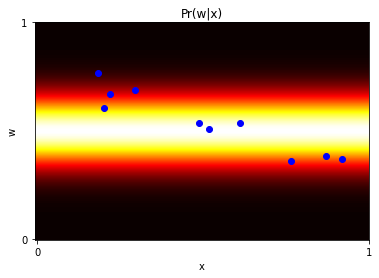

In [21]:
#Fit the data
offsetEst,slopeEst,noiseEst= fitLinearRegressionML(X,w);

#Let's draw a figure to show the posterior probability 
#of the world as a function of the data
#For every x, the model predicts a normal distribution over w

X2 =np.arange(0,1,step=0.005)
num_data = X2.size

#TO DO Inference: For each element in X2, compute the mean and the variance of the posterior distribution over w

#Replace this:
predMean = np.ones_like(X2);
predVar = 0.05*np.ones_like(X2);

#performing checks on the size of the data created 
if not ( predMean.squeeze().ndim==1 and predMean.size==num_data):
    raise ValueError('predMean should be same size as variable X2')
elif  not ( predVar.squeeze().ndim==1 and predMean.size==num_data):
    raise ValueError('predVar should be same size as variable X2')
else:
    pass

#compute the pixel colours for the image - one Gaussian in each column
wFig = np.arange(0,2,step=0.005) #0:0.005:2;

postFun = np.zeros((wFig.size,num_data))
predMean = predMean.squeeze() # remove redundant dim if any
for cX in range(num_data):
    postFun[:,cX] = (1/np.sqrt(2*np.pi*predVar[cX])) * np.exp( -0.5*((wFig-predMean[cX])**2)/predVar[cX] ) 
    
#draw the figure
fig=plt.figure()
plt.imshow(postFun)
plt.set_cmap('hot')
plt.gca().invert_yaxis() 

#draw the points on top - they need to be rescaled so that they are in the 
#units of the pixels used to draw the picture
plt.plot((X-X2[0])/(X2[1]-X2[0]), (w.transpose()-wFig[0])/(wFig[1]-wFig[0]),'bo')

#draw the units on the graph
ax0=fig.axes[0]
ax0.set_xticks([1,X2.size])
ax0.set_xticklabels([0,1])
ax0.set_yticks([1,wFig.size])
ax0.set_yticklabels([0,1])
ax0.set_aspect('auto')
plt.xlabel('x')
plt.ylabel('w')
plt.title('Pr(w|x)')

plt.show()